In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import lightgbm as lgbm
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
def mape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    z = np.mean(np.abs((y_true-y_pred)/y_true))
    return z
from sklearn.metrics import make_scorer, silhouette_score
mapes = make_scorer(mape)
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, IsolationForest, VotingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor,LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.preprocessing import PolynomialFeatures, RobustScaler,StandardScaler,PowerTransformer,QuantileTransformer,MinMaxScaler, LabelEncoder,OneHotEncoder, FunctionTransformer, quantile_transform, power_transform
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import normaltest, zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ARDRegression, LinearRegression, SGDRegressor, RANSACRegressor, BayesianRidge, LassoCV, ElasticNetCV, LassoLars, LassoLarsCV, OrthogonalMatchingPursuitCV, OrthogonalMatchingPursuit,RidgeCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.covariance import EllipticEnvelope
from sklearn.manifold import TSNE
from sklearn.pipeline import FeatureUnion
import catboost as cb
from sklearn.svm import SVR, OneClassSVM
from sklearn.base import TransformerMixin
from sklearn.decomposition import KernelPCA
from mlxtend.regressor import StackingCVRegressor,StackingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.covariance import EllipticEnvelope

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train_x = data_train.iloc[:,2:]
data_train_y = data_train.iloc[:,1]
cat_feature = data_train_x.iloc[:,:10]
num_feature = data_train_x.iloc[:,10:]
data_test_x = data_test.iloc[:,1:]
cat_feature_col = cat_feature.columns
num_feature_col = num_feature.columns

In [3]:
col_want = ['Cat_02','Cat_04', 'Col_0005', 'Col_0248', 'Col_0271', 'Col_0380', 'Col_0590',
       'Col_0592', 'Col_0685', 'Col_0695', 'Col_0712', 'Col_0717', 'Col_0720',
       'Col_0804', 'Col_0816', 'Col_1002', 'Col_1044', 'Col_1058', 'Col_1078',
       'Col_1091', 'Col_1135', 'Col_1188', 'Col_1315', 'Col_1485', 'Col_1683',
       'Col_1845', 'Col_1939', 'Col_2175', 'Col_2581', 'Col_2643', 'Col_2969',
       'Col_3080', 'Col_3166', 'Col_3841', 'Col_3848', 'Col_3867', 'Col_3871',
       'Col_3874', 'Col_3875', 'Col_3970', 'Col_4181', 'Col_0443',
       'Col_0566', 'Col_0606',
       'Col_0739', 'Col_0855', 'Col_0871',
       'Col_0921', 'Col_1121', 'Col_1182',
       'Col_1196', 'Col_1265', 'Col_1522',
       'Col_1564', 'Col_1636', 'Col_1772',
       'Col_1912', 'Col_1978', 'Col_2041',
       'Col_2046', 'Col_2280', 'Col_2570',
       'Col_2723', 'Col_2730', 'Col_2841',
       'Col_2985', 'Col_3202', 'Col_3234',
       'Col_3342', 'Col_3396', 'Col_3459',
       'Col_3631', 'Col_3696', 'Col_3704',
       'Col_4026', 'Col_4109', 'Col_4160', 'Col_0225']
data_train_x_want = data_train_x[col_want]
cat_feature_want = col_want[:2]
num_feature_want = col_want[2:]

In [83]:
##############################use lasso+omp sel detect try impute cv################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))#6
    #('imputer',IterativeImputer(estimator=BayesianRidge(),max_iter=50,sample_posterior=False,add_indicator=True,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform,num_feature_want)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('polyfeature',polyfeature),
    ('omp',OrthogonalMatchingPursuitCV(cv=10))#11
])
#x_want = pd.DataFrame(pipe.fit_transform(data_train_x_want))
cvsmape = cross_val_score(pipe,data_train_x_want.drop([0,34,84,208]),data_train_y.drop([0,34,84,208]),cv=10,scoring=mapes)
#cvsmse = cross_val_score(pipe,data_train_x_want,data_train_y,cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
#print(-cvsmse.mean(),cvsmse.std())

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

0.01111889770439295 0.002984412852855132 0.988881102295607


In [84]:
##############################ensemble use lasso+omp sel try impute cv################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=BayesianRidge(),add_indicator=True,max_iter=50,verbose=3))
])
num_transform2 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=GaussianMixture(),add_indicator=True,max_iter=50,verbose=3))
])
num_transform3 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=KNeighborsRegressor(80),add_indicator=True,max_iter=50,verbose=3))
])
num_transform4 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    #('imputer',IterativeImputer(estimator=SVR(),add_indicator=True,max_iter=50,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform,num_feature_want)
])
preprocess2 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform2,num_feature_want)
])
preprocess3 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform3,num_feature_want)
])
preprocess4 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform4,num_feature_want)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])

# l = LassoCV(cv=10)
# ll = LassoLarsCV(cv=10)
# rr = RidgeCV(cv=10)
# svr = SVR(kernel='linear')
# omp = OrthogonalMatchingPursuitCV(cv=10)
# xg = xgb.XGBRegressor(objective='reg:squarederror')
# l2 = LassoCV(cv=10)
# stack = StackingRegressor(regressors=(omp,ll,rr,xg,svr,l),
#                            meta_regressor=l2,
#                            verbose=1)

pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuitCV(cv=10))
])
pipe2 = Pipeline(steps=[
    ('preprocess',preprocess2),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuitCV(cv=10))
])
pipe3 = Pipeline(steps=[
    ('preprocess',preprocess3),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuitCV(cv=10))
])


er = VotingRegressor([('1',pipe),
                      ('2',pipe2),
                      ('3',pipe3),
])
cvsmape = cross_val_score(er,data_train_x_want.drop([0,34,84,208]),data_train_y.drop([0,34,84,208]),cv=10,scoring=mapes)
cvsmse = cross_val_score(er,data_train_x_want.drop([0,34,84,208]),data_train_y.drop([0,34,84,208]),cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
print(-cvsmse.mean(),cvsmse.std())

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.79
[IterativeImputer] Change: 4.922911100469551, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 2/50, elapsed time 3.07
[IterativeImputer] Change: 1.1516517963938417, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 3/50, elapsed time 4.85
[IterativeImputer] Change: 0.21033511770353092, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 4/50, elapsed time 6.34
[IterativeImputer] Change: 0.157257403596689, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 5/50, elapsed time 8.67
[IterativeImputer] Change: 0.11936761757966478, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 6/50, elapsed time 10.34
[IterativeImputer] Change: 0.09303416677001461, scaled tolerance: 0.010592152541774662 
[IterativeImpute

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.50
[IterativeImputer] Change: 6.081960360569009e-14, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.16
[IterativeImputer] Change: 1.4285947991816537, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.28
[IterativeImputer] Change: 0.14735233128144917, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.41
[IterativeImputer] Change: 0.046670572242956024, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.54
[IterativeImputer] Change: 0.03312694673603169, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.66
[IterativeImputer] Change: 0.03312694673603169, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.79
[IterativeImputer] Change: 0.03312694673603169, scaled tolerance: 0.010592152541774662 
[IterativeIm

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (25, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.06
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.12
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.13
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.13


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.52
[IterativeImputer] Change: 5.153128430578693e-14, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.15
[IterativeImputer] Change: 1.1796606920775865, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.29
[IterativeImputer] Change: 0.17251986453630544, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.42
[IterativeImputer] Change: 0.07691415773826597, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.55
[IterativeImputer] Change: 0.06583447811834682, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.67
[IterativeImputer] Change: 0.06583447811834682, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.80
[IterativeImputer] Change: 0.06583447811834682, scaled tolerance: 0.010768258020328545 
[IterativeImp

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (25, 76)
[IterativeImputer] Ending imputation round 1/17, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/17, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/17, elapsed time 0.02
[IterativeImputer] Ending imputation round 4/17, elapsed time 0.03
[IterativeImputer] Ending imputation round 5/17, elapsed time 0.04
[IterativeImputer] Ending imputation round 6/17, elapsed time 0.05
[IterativeImputer] Ending imputation round 7/17, elapsed time 0.06
[IterativeImputer] Ending imputation round 8/17, elapsed time 0.07
[IterativeImputer] Ending imputation round 9/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 10/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 11/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 12/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 13/17, elapsed time 0.10
[IterativeImputer] Ending imputation round 14/17, elapsed time 0.11


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.06
[IterativeImputer] Change: 7.829565062340746e-14, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.17
[IterativeImputer] Change: 1.3528005831883043, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.30
[IterativeImputer] Change: 0.205875920204993, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.43
[IterativeImputer] Change: 0.13538211980010392, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.56
[IterativeImputer] Change: 0.06219032380821242, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.69
[IterativeImputer] Change: 0.060134518122261144, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.81
[IterativeImputer] Change: 0.060134518122261144, scaled tolerance: 0.01058830920529277 
[IterativeImputer] 

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (25, 76)
[IterativeImputer] Ending imputation round 1/14, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/14, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/14, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/14, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/14, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/14, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/14, elapsed time 0.07
[IterativeImputer] Ending imputation round 8/14, elapsed time 0.08
[IterativeImputer] Ending imputation round 9/14, elapsed time 0.09
[IterativeImputer] Ending imputation round 10/14, elapsed time 0.10
[IterativeImputer] Ending imputation round 11/14, elapsed time 0.11
[IterativeImputer] Ending imputation round 12/14, elapsed time 0.12
[IterativeImputer] Ending imputation round 13/14, elapsed time 0.14
[IterativeImputer] Ending imputation round 14/14, elapsed time 0.15


[IterativeImputer] Ending imputation round 24/50, elapsed time 39.64
[IterativeImputer] Change: 0.023369779326313914, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 25/50, elapsed time 40.42
[IterativeImputer] Change: 0.021732989577244507, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 26/50, elapsed time 41.02
[IterativeImputer] Change: 0.02021069022402064, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 27/50, elapsed time 41.96
[IterativeImputer] Change: 0.01879488775514497, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 28/50, elapsed time 44.07
[IterativeImputer] Change: 0.017478145076150614, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 29/50, elapsed time 45.75
[IterativeImputer] Change: 0.016253542970985413, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 30/50, elap

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.20
[IterativeImputer] Change: 1.3444470542848722e-13, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.15
[IterativeImputer] Change: 1.452451824866028, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.28
[IterativeImputer] Change: 0.15238344381130597, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.41
[IterativeImputer] Change: 0.17129529613576328, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.53
[IterativeImputer] Change: 0.1755747477329337, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.66
[IterativeImputer] Change: 0.09587279585271957, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.85
[IterativeImputer] Change: 0.17129529613576328, scaled tolerance: 0.010600598594633779 
[IterativeImput

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (25, 76)
[IterativeImputer] Ending imputation round 1/35, elapsed time 0.03
[IterativeImputer] Ending imputation round 2/35, elapsed time 0.04
[IterativeImputer] Ending imputation round 3/35, elapsed time 0.07
[IterativeImputer] Ending imputation round 4/35, elapsed time 0.08
[IterativeImputer] Ending imputation round 5/35, elapsed time 0.09
[IterativeImputer] Ending imputation round 6/35, elapsed time 0.09
[IterativeImputer] Ending imputation round 7/35, elapsed time 0.10
[IterativeImputer] Ending imputation round 8/35, elapsed time 0.10
[IterativeImputer] Ending imputation round 9/35, elapsed time 0.11
[IterativeImputer] Ending imputation round 10/35, elapsed time 0.12
[IterativeImputer] Ending imputation round 11/35, elapsed time 0.12
[IterativeImputer] Ending imputation round 12/35, elapsed time 0.13
[IterativeImputer] Ending imputation round 13/35, elapsed time 0.14
[IterativeImputer] Ending imputation round 14/35, elapsed time 0.14


[IterativeImputer] Ending imputation round 15/50, elapsed time 22.75
[IterativeImputer] Change: 0.010194225447543323, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 16/50, elapsed time 25.37
[IterativeImputer] Change: 0.007858672731462329, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.11
[IterativeImputer] Change: 8.144625710288835e-14, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.22
[IterativeImputer] Change: 1.330596483922478, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.40
[IterativeImputer] Change: 0.19134457914099048, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.59
[IterativeImputer] Change: 0.11024441235545074, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.78
[IterativeImputer] Change: 0.05822128902997525, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.96
[IterativeImputer] Change: 0.05822128902997526, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 6/50, elapsed time 1.15
[IterativeImputer] Change: 0.05822128902997526, scaled tolerance: 0.009754469303928473 
[IterativeImpu

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.06
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.12
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.12
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.13
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.14


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.06
[IterativeImputer] Change: 8.873862016020864e-14, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.16
[IterativeImputer] Change: 1.4174275722283607, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.29
[IterativeImputer] Change: 0.16164072560014442, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.42
[IterativeImputer] Change: 0.10847945755054753, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.55
[IterativeImputer] Change: 0.1084794575505475, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.69
[IterativeImputer] Change: 0.1084794575505475, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.82
[IterativeImputer] Change: 0.1084794575505475, scaled tolerance: 0.01068002325535637 
[IterativeImputer] End

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.04
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.12
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.13
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.14
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.15


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.47
[IterativeImputer] Change: 6.663996477444286e-14, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.22
[IterativeImputer] Change: 1.3850121310898889, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.50
[IterativeImputer] Change: 0.23419546946622902, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.71
[IterativeImputer] Change: 0.11216129637550318, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.92
[IterativeImputer] Change: 0.07733750101120757, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 5/50, elapsed time 1.21
[IterativeImputer] Change: 0.07733750101120758, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 6/50, elapsed time 1.42
[IterativeImputer] Change: 0.07733750101120758, scaled tolerance: 0.010574023933602874 
[IterativeImp

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/18, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/18, elapsed time 0.03
[IterativeImputer] Ending imputation round 3/18, elapsed time 0.05
[IterativeImputer] Ending imputation round 4/18, elapsed time 0.07
[IterativeImputer] Ending imputation round 5/18, elapsed time 0.08
[IterativeImputer] Ending imputation round 6/18, elapsed time 0.09
[IterativeImputer] Ending imputation round 7/18, elapsed time 0.09
[IterativeImputer] Ending imputation round 8/18, elapsed time 0.10
[IterativeImputer] Ending imputation round 9/18, elapsed time 0.11
[IterativeImputer] Ending imputation round 10/18, elapsed time 0.11
[IterativeImputer] Ending imputation round 11/18, elapsed time 0.12
[IterativeImputer] Ending imputation round 12/18, elapsed time 0.13
[IterativeImputer] Ending imputation round 13/18, elapsed time 0.13
[IterativeImputer] Ending imputation round 14/18, elapsed time 0.14


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.14
[IterativeImputer] Change: 1.4058889647215714e-13, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.17
[IterativeImputer] Change: 1.4993872845596405, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.29
[IterativeImputer] Change: 0.16376612409351393, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.42
[IterativeImputer] Change: 0.049468024373932135, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.57
[IterativeImputer] Change: 0.05125424209396976, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.75
[IterativeImputer] Change: 0.05125424209396976, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.87
[IterativeImputer] Change: 0.05125424209396976, scaled tolerance: 0.010503951682710932 
[IterativeIm

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.11


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.25
[IterativeImputer] Change: 8.185279203342309e-14, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.15
[IterativeImputer] Change: 1.5935984247391088, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.34
[IterativeImputer] Change: 0.22991255101431363, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.52
[IterativeImputer] Change: 0.05310876210028259, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.70
[IterativeImputer] Change: 0.05214427022687387, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.89
[IterativeImputer] Change: 5.551115123125783e-17, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/17, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/17, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/17, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/17, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/17, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/17, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/17, elapsed time 0.06
[IterativeImputer] Ending imputation round 8/17, elapsed time 0.07
[IterativeImputer] Ending imputation round 9/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 10/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 11/17, elapsed time 0.10
[IterativeImputer] Ending imputation round 12/17, elapsed time 0.11
[IterativeImputer] Ending imputation round 13/17, elapsed time 0.12
[IterativeImputer] Ending imputation round 14/17, elapsed time 0.13


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.30
[IterativeImputer] Change: 9.40963116913173e-14, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.16
[IterativeImputer] Change: 1.4346595869529057, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.31
[IterativeImputer] Change: 0.18251893244634337, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.43
[IterativeImputer] Change: 0.07456443700906479, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.56
[IterativeImputer] Change: 0.047652430223546524, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.68
[IterativeImputer] Change: 0.039566562584265344, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.81
[IterativeImputer] Change: 0.039566562584265344, scaled tolerance: 0.01065708778290151 
[IterativeImpute

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.03
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.06
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.12
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.12
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.13
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.14
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.14


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 2.18
[IterativeImputer] Change: 6.081960360569009e-14, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.25
[IterativeImputer] Change: 1.4285947991816537, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.50
[IterativeImputer] Change: 0.14735233128144917, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.74
[IterativeImputer] Change: 0.046670572242956024, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.96
[IterativeImputer] Change: 0.03312694673603169, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 5/50, elapsed time 1.20
[IterativeImputer] Change: 0.03312694673603169, scaled tolerance: 0.010592152541774662 
[IterativeImputer] Ending imputation round 6/50, elapsed time 1.41
[IterativeImputer] Change: 0.03312694673603169, scaled tolerance: 0.010592152541774662 
[IterativeIm

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (25, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.12
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.13
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.13
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.14
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.15


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.08
[IterativeImputer] Change: 5.153128430578693e-14, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.15
[IterativeImputer] Change: 1.1796606920775865, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.32
[IterativeImputer] Change: 0.17251986453630544, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.50
[IterativeImputer] Change: 0.07691415773826597, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.69
[IterativeImputer] Change: 0.06583447811834682, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.88
[IterativeImputer] Change: 0.06583447811834682, scaled tolerance: 0.010768258020328545 
[IterativeImputer] Ending imputation round 6/50, elapsed time 1.03
[IterativeImputer] Change: 0.06583447811834682, scaled tolerance: 0.010768258020328545 
[IterativeImp

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (25, 76)
[IterativeImputer] Ending imputation round 1/17, elapsed time 0.02
[IterativeImputer] Ending imputation round 2/17, elapsed time 0.04
[IterativeImputer] Ending imputation round 3/17, elapsed time 0.07
[IterativeImputer] Ending imputation round 4/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 5/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 6/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 7/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 8/17, elapsed time 0.10
[IterativeImputer] Ending imputation round 9/17, elapsed time 0.11
[IterativeImputer] Ending imputation round 10/17, elapsed time 0.11
[IterativeImputer] Ending imputation round 11/17, elapsed time 0.12
[IterativeImputer] Ending imputation round 12/17, elapsed time 0.13
[IterativeImputer] Ending imputation round 13/17, elapsed time 0.13
[IterativeImputer] Ending imputation round 14/17, elapsed time 0.14


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.85
[IterativeImputer] Change: 7.829565062340746e-14, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.16
[IterativeImputer] Change: 1.3528005831883043, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.28
[IterativeImputer] Change: 0.205875920204993, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.41
[IterativeImputer] Change: 0.13538211980010392, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.54
[IterativeImputer] Change: 0.06219032380821242, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.67
[IterativeImputer] Change: 0.060134518122261144, scaled tolerance: 0.01058830920529277 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.82
[IterativeImputer] Change: 0.060134518122261144, scaled tolerance: 0.01058830920529277 
[IterativeImputer] 

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (25, 76)
[IterativeImputer] Ending imputation round 1/14, elapsed time 0.05
[IterativeImputer] Ending imputation round 2/14, elapsed time 0.06
[IterativeImputer] Ending imputation round 3/14, elapsed time 0.09
[IterativeImputer] Ending imputation round 4/14, elapsed time 0.10
[IterativeImputer] Ending imputation round 5/14, elapsed time 0.11
[IterativeImputer] Ending imputation round 6/14, elapsed time 0.12
[IterativeImputer] Ending imputation round 7/14, elapsed time 0.14
[IterativeImputer] Ending imputation round 8/14, elapsed time 0.15
[IterativeImputer] Ending imputation round 9/14, elapsed time 0.16
[IterativeImputer] Ending imputation round 10/14, elapsed time 0.17
[IterativeImputer] Ending imputation round 11/14, elapsed time 0.18
[IterativeImputer] Ending imputation round 12/14, elapsed time 0.19
[IterativeImputer] Ending imputation round 13/14, elapsed time 0.21
[IterativeImputer] Ending imputation round 14/14, elapsed time 0.22


[IterativeImputer] Ending imputation round 24/50, elapsed time 33.07
[IterativeImputer] Change: 0.023369779326313914, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 25/50, elapsed time 33.54
[IterativeImputer] Change: 0.021732989577244507, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 26/50, elapsed time 34.14
[IterativeImputer] Change: 0.02021069022402064, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 27/50, elapsed time 34.90
[IterativeImputer] Change: 0.01879488775514497, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 28/50, elapsed time 35.76
[IterativeImputer] Change: 0.017478145076150614, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 29/50, elapsed time 36.80
[IterativeImputer] Change: 0.016253542970985413, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 30/50, elap

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.12
[IterativeImputer] Change: 1.3444470542848722e-13, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (219, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.15
[IterativeImputer] Change: 1.452451824866028, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.27
[IterativeImputer] Change: 0.15238344381130597, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.40
[IterativeImputer] Change: 0.17129529613576328, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.52
[IterativeImputer] Change: 0.1755747477329337, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.65
[IterativeImputer] Change: 0.09587279585271957, scaled tolerance: 0.010600598594633779 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.77
[IterativeImputer] Change: 0.17129529613576328, scaled tolerance: 0.010600598594633779 
[IterativeImput

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (25, 76)
[IterativeImputer] Ending imputation round 1/35, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/35, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/35, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/35, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/35, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/35, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/35, elapsed time 0.07
[IterativeImputer] Ending imputation round 8/35, elapsed time 0.08
[IterativeImputer] Ending imputation round 9/35, elapsed time 0.08
[IterativeImputer] Ending imputation round 10/35, elapsed time 0.09
[IterativeImputer] Ending imputation round 11/35, elapsed time 0.10
[IterativeImputer] Ending imputation round 12/35, elapsed time 0.10
[IterativeImputer] Ending imputation round 13/35, elapsed time 0.11
[IterativeImputer] Ending imputation round 14/35, elapsed time 0.12


[IterativeImputer] Ending imputation round 15/50, elapsed time 14.91
[IterativeImputer] Change: 0.010194225447543323, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 16/50, elapsed time 16.07
[IterativeImputer] Change: 0.007858672731462329, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.88
[IterativeImputer] Change: 8.144625710288835e-14, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.16
[IterativeImputer] Change: 1.330596483922478, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.28
[IterativeImputer] Change: 0.19134457914099048, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.41
[IterativeImputer] Change: 0.11024441235545074, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.54
[IterativeImputer] Change: 0.05822128902997525, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.66
[IterativeImputer] Change: 0.05822128902997526, scaled tolerance: 0.009754469303928473 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.79
[IterativeImputer] Change: 0.05822128902997526, scaled tolerance: 0.009754469303928473 
[IterativeImpu

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.11


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.03
[IterativeImputer] Change: 8.873862016020864e-14, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.16
[IterativeImputer] Change: 1.4174275722283607, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.28
[IterativeImputer] Change: 0.16164072560014442, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.43
[IterativeImputer] Change: 0.10847945755054753, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.56
[IterativeImputer] Change: 0.1084794575505475, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.69
[IterativeImputer] Change: 0.1084794575505475, scaled tolerance: 0.01068002325535637 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.81
[IterativeImputer] Change: 0.1084794575505475, scaled tolerance: 0.01068002325535637 
[IterativeImputer] End

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.11


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.84
[IterativeImputer] Change: 6.663996477444286e-14, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.16
[IterativeImputer] Change: 1.3850121310898889, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.31
[IterativeImputer] Change: 0.23419546946622902, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.43
[IterativeImputer] Change: 0.11216129637550318, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.58
[IterativeImputer] Change: 0.07733750101120757, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.70
[IterativeImputer] Change: 0.07733750101120758, scaled tolerance: 0.010574023933602874 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.84
[IterativeImputer] Change: 0.07733750101120758, scaled tolerance: 0.010574023933602874 
[IterativeImp

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/18, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/18, elapsed time 0.03
[IterativeImputer] Ending imputation round 3/18, elapsed time 0.04
[IterativeImputer] Ending imputation round 4/18, elapsed time 0.05
[IterativeImputer] Ending imputation round 5/18, elapsed time 0.07
[IterativeImputer] Ending imputation round 6/18, elapsed time 0.08
[IterativeImputer] Ending imputation round 7/18, elapsed time 0.08
[IterativeImputer] Ending imputation round 8/18, elapsed time 0.09
[IterativeImputer] Ending imputation round 9/18, elapsed time 0.10
[IterativeImputer] Ending imputation round 10/18, elapsed time 0.10
[IterativeImputer] Ending imputation round 11/18, elapsed time 0.11
[IterativeImputer] Ending imputation round 12/18, elapsed time 0.12
[IterativeImputer] Ending imputation round 13/18, elapsed time 0.12
[IterativeImputer] Ending imputation round 14/18, elapsed time 0.13


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.73
[IterativeImputer] Change: 1.4058889647215714e-13, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.15
[IterativeImputer] Change: 1.4993872845596405, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.27
[IterativeImputer] Change: 0.16376612409351393, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.40
[IterativeImputer] Change: 0.049468024373932135, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.52
[IterativeImputer] Change: 0.05125424209396976, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.65
[IterativeImputer] Change: 0.05125424209396976, scaled tolerance: 0.010503951682710932 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.78
[IterativeImputer] Change: 0.05125424209396976, scaled tolerance: 0.010503951682710932 
[IterativeIm

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.12


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.72
[IterativeImputer] Change: 8.185279203342309e-14, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.15
[IterativeImputer] Change: 1.5935984247391088, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.28
[IterativeImputer] Change: 0.22991255101431363, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.40
[IterativeImputer] Change: 0.05310876210028259, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.53
[IterativeImputer] Change: 0.05214427022687387, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.66
[IterativeImputer] Change: 5.551115123125783e-17, scaled tolerance: 0.010791408411862224 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/17, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/17, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/17, elapsed time 0.04
[IterativeImputer] Ending imputation round 4/17, elapsed time 0.05
[IterativeImputer] Ending imputation round 5/17, elapsed time 0.06
[IterativeImputer] Ending imputation round 6/17, elapsed time 0.07
[IterativeImputer] Ending imputation round 7/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 8/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 9/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 10/17, elapsed time 0.10
[IterativeImputer] Ending imputation round 11/17, elapsed time 0.10
[IterativeImputer] Ending imputation round 12/17, elapsed time 0.11
[IterativeImputer] Ending imputation round 13/17, elapsed time 0.12
[IterativeImputer] Ending imputation round 14/17, elapsed time 0.12


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.69
[IterativeImputer] Change: 9.40963116913173e-14, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Early stopping criterion reached.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

[IterativeImputer] Completing matrix with shape (220, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.15
[IterativeImputer] Change: 1.4346595869529057, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.30
[IterativeImputer] Change: 0.18251893244634337, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.42
[IterativeImputer] Change: 0.07456443700906479, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.55
[IterativeImputer] Change: 0.047652430223546524, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.67
[IterativeImputer] Change: 0.039566562584265344, scaled tolerance: 0.01065708778290151 
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.80
[IterativeImputer] Change: 0.039566562584265344, scaled tolerance: 0.01065708778290151 
[IterativeImpute

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)

[IterativeImputer] Completing matrix with shape (24, 76)
[IterativeImputer] Ending imputation round 1/16, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/16, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/16, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/16, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/16, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/16, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/16, elapsed time 0.07
[IterativeImputer] Ending imputation round 8/16, elapsed time 0.08
[IterativeImputer] Ending imputation round 9/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 10/16, elapsed time 0.09
[IterativeImputer] Ending imputation round 11/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 12/16, elapsed time 0.10
[IterativeImputer] Ending imputation round 13/16, elapsed time 0.11
[IterativeImputer] Ending imputation round 14/16, elapsed time 0.12


In [76]:
##############################ensemble use lasso+omp sel try impute to predict################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=BayesianRidge(),add_indicator=True,max_iter=50,verbose=3))
])
num_transform2 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=GaussianMixture(),add_indicator=True,max_iter=50,verbose=3))
])
num_transform3 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=KNeighborsRegressor(80),add_indicator=True,max_iter=50,verbose=3))
])
num_transform4 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    #('imputer',IterativeImputer(estimator=SVR(),add_indicator=True,max_iter=50,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform,num_feature_want)
])
preprocess2 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform2,num_feature_want)
])
preprocess3 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform3,num_feature_want)
])
preprocess4 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform4,num_feature_want)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])

# l = LassoCV(cv=10)
# ll = LassoLarsCV(cv=10)
# rr = RidgeCV(cv=10)
# svr = SVR(kernel='linear')
# omp = OrthogonalMatchingPursuitCV(cv=10)
# xg = xgb.XGBRegressor(objective='reg:squarederror')
# l2 = LassoCV(cv=10)
# stack = StackingRegressor(regressors=(omp,ll,rr,xg,svr,l),
#                            meta_regressor=l2,
#                            verbose=1)

pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuit(11))
])
pipe2 = Pipeline(steps=[
    ('preprocess',preprocess2),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuit(11))
])
pipe3 = Pipeline(steps=[
    ('preprocess',preprocess3),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuit(11))
])


er = VotingRegressor([('1',pipe),
                      ('2',pipe2),
                      ('3',pipe3),
])
er.fit(data_train_x_want,data_train_y)
y_pred = er.predict(data_test_x)

[IterativeImputer] Completing matrix with shape (248, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.11
[IterativeImputer] Change: 6.255931778051172, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 2/50, elapsed time 2.92
[IterativeImputer] Change: 1.2860961443863062, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 3/50, elapsed time 4.01
[IterativeImputer] Change: 0.21109517110647064, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 4/50, elapsed time 5.36
[IterativeImputer] Change: 0.15199892156622502, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 5/50, elapsed time 6.61
[IterativeImputer] Change: 0.12637435227954563, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 6/50, elapsed time 7.73
[IterativeImputer] Change: 0.10353112476804663, scaled tolerance: 0.012261331398071106 
[IterativeImput

[IterativeImputer] Ending imputation round 35/50, elapsed time 4.99
[IterativeImputer] Change: 0.08776271988482642, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 36/50, elapsed time 5.13
[IterativeImputer] Change: 0.08776271988482642, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 37/50, elapsed time 5.27
[IterativeImputer] Change: 0.08776271988482642, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 38/50, elapsed time 5.42
[IterativeImputer] Change: 0.08776271988482642, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 39/50, elapsed time 5.56
[IterativeImputer] Change: 0.08776271988482642, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 40/50, elapsed time 5.70
[IterativeImputer] Change: 0.08776271988482642, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 41/50, elapsed time 5

/opt/conda/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


[IterativeImputer] Ending imputation round 1/17, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/17, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/17, elapsed time 0.04
[IterativeImputer] Ending imputation round 4/17, elapsed time 0.05
[IterativeImputer] Ending imputation round 5/17, elapsed time 0.06
[IterativeImputer] Ending imputation round 6/17, elapsed time 0.07
[IterativeImputer] Ending imputation round 7/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 8/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 9/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 10/17, elapsed time 0.10
[IterativeImputer] Ending imputation round 11/17, elapsed time 0.11
[IterativeImputer] Ending imputation round 12/17, elapsed time 0.12
[IterativeImputer] Ending imputation round 13/17, elapsed time 0.12
[IterativeImputer] Ending imputation round 14/17, elapsed time 0.13
[IterativeImputer] Ending imputation round 15/17, elapsed

/opt/conda/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


[IterativeImputer] Ending imputation round 1/50, elapsed time 0.07
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.11
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.16
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.20
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.24
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.28
[IterativeImputer] Ending imputation round 7/50, elapsed time 0.33
[IterativeImputer] Ending imputation round 8/50, elapsed time 0.37
[IterativeImputer] Ending imputation round 9/50, elapsed time 0.41
[IterativeImputer] Ending imputation round 10/50, elapsed time 0.46
[IterativeImputer] Ending imputation round 11/50, elapsed time 0.50
[IterativeImputer] Ending imputation round 12/50, elapsed time 0.54
[IterativeImputer] Ending imputation round 13/50, elapsed time 0.59
[IterativeImputer] Ending imputation round 14/50, elapsed time 0.63
[IterativeImputer] Ending imputation round 15/50, elapsed

In [77]:
plt.figure(figsize=(20,5))
plt.plot(er.predict(data_train_x_want))
plt.plot(np.array(data_train_y))
1-mape(er.predict(data_train_x_want),data_train_y)

[IterativeImputer] Completing matrix with shape (248, 76)
[IterativeImputer] Ending imputation round 1/17, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/17, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/17, elapsed time 0.03
[IterativeImputer] Ending imputation round 4/17, elapsed time 0.04
[IterativeImputer] Ending imputation round 5/17, elapsed time 0.05
[IterativeImputer] Ending imputation round 6/17, elapsed time 0.06
[IterativeImputer] Ending imputation round 7/17, elapsed time 0.07
[IterativeImputer] Ending imputation round 8/17, elapsed time 0.07
[IterativeImputer] Ending imputation round 9/17, elapsed time 0.08
[IterativeImputer] Ending imputation round 10/17, elapsed time 0.09
[IterativeImputer] Ending imputation round 11/17, elapsed time 0.10
[IterativeImputer] Ending imputation round 12/17, elapsed time 0.11
[IterativeImputer] Ending imputation round 13/17, elapsed time 0.12
[IterativeImputer] Ending imputation round 14/17, elapsed time 0.12

[IterativeImputer] Ending imputation round 33/50, elapsed time 2.57
[IterativeImputer] Ending imputation round 34/50, elapsed time 2.65
[IterativeImputer] Ending imputation round 35/50, elapsed time 2.73
[IterativeImputer] Ending imputation round 36/50, elapsed time 2.80
[IterativeImputer] Ending imputation round 37/50, elapsed time 2.88
[IterativeImputer] Ending imputation round 38/50, elapsed time 2.95
[IterativeImputer] Ending imputation round 39/50, elapsed time 3.03
[IterativeImputer] Ending imputation round 40/50, elapsed time 3.10
[IterativeImputer] Ending imputation round 41/50, elapsed time 3.18
[IterativeImputer] Ending imputation round 42/50, elapsed time 3.26
[IterativeImputer] Ending imputation round 43/50, elapsed time 3.34
[IterativeImputer] Ending imputation round 44/50, elapsed time 3.41
[IterativeImputer] Ending imputation round 45/50, elapsed time 3.49
[IterativeImputer] Ending imputation round 46/50, elapsed time 3.57
[IterativeImputer] Ending imputation round 47/50

0.9919344806987915

In [79]:
##############################use lasso+omp sel try gbr cv################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))#6
    #('imputer',IterativeImputer(estimator=LassoLars(),max_iter=50,sample_posterior=False,add_indicator=True,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform,num_feature_want)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('polyfeature',polyfeature),
    ('omp',SelectFromModel(OrthogonalMatchingPursuitCV(cv=10))),#11
    ('gbr',GradientBoostingRegressor(loss='huber'))
])
# search_space = [{'gbr__loss':['ls', 'huber'],#'ls'#'huber'#'ls'
#                  'gbr__learning_rate':[0.08, 0.1, 0.2],#0.1#0.08
#                  'gbr__subsample':[0.1,0.2,0.3],#0.5#0.3#0.2
#                  'gbr__min_weight_fraction_leaf':[0,0.0001]#0#0.0001
# }]
# rs =RandomizedSearchCV(pipe,search_space,n_iter=60,cv=5,verbose=1)
# best_model = rs.fit(data_train_x_want,data_train_y)

cvsmape = cross_val_score(pipe,data_train_x_want,data_train_y,cv=10,scoring=mapes)
#cvsmse = cross_val_score(pipe,data_train_x_want,data_train_y,cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
#print(-cvsmse.mean(),cvsmse.std())

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The 

0.014350185938724253 0.0013071669642559793 0.9856498140612757


In [ ]:
##############################lasso sel poly2 omp cv################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))#6
    #('imputer',IterativeImputer(estimator=LassoLars(),max_iter=50,sample_posterior=False,add_indicator=True,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_col),
    ('num',num_transform,num_feature_col)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select_lassolars',SelectFromModel(LassoLarsCV(cv=10))),
    #('polyfeature',polyfeature),
    ('omp',OrthogonalMatchingPursuitCV(cv=10))
])
cvsmape = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring=mapes)
#cvsmse = cross_val_score(pipe,data_train_x_want,data_train_y,cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
#print(-cvsmse.mean(),cvsmse.std())

In [ ]:
##############################use lasso+omp sel try impute to predict################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True))
    #('imputer',IterativeImputer(estimator=BayesianRidge(),add_indicator=True,max_iter=50,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform,num_feature_want)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=3))])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('polyfeature',polyfeature),
])
x_want = pd.DataFrame(pipe.fit_transform(data_train_x_want))

In [ ]:
x_want

In [ ]:
model = OrthogonalMatchingPursuitCV(cv=10)
model.fit(x_want,data_train_y)
data_private = pd.read_csv('test.csv')
data_private_x = data_test.iloc[:,1:]
data_private_x_want = data_private_x[col_want]
y_pred_want= model.predict(pipe.transform(data_private_x_want))

In [ ]:
iw = pd.Series(model.coef_)[pd.Series(model.coef_)!=0].index

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(model.predict(x_want))
plt.plot(np.array(data_train_y))
1-mape(model.predict(x_want),data_train_y)

In [ ]:
#############################add columns names################################
cat_pre_col = []
for i, col in enumerate(cat_feature_want):
    for j in range(data_test_x[col].nunique()):
        name = col+'_'+str(j)
        cat_pre_col.append(name)

for i, col in enumerate(cat_feature_want):
    for j in range(2):
        name = col+'_addindi'+str(j)
        cat_pre_col.append(name)
        
num_pre_col = num_feature_want.copy()
for i, col in enumerate(num_feature_want):
    name = col+'_addindi'
    num_pre_col.append(name)
    
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform,num_feature_want)
])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
])
x_add = pd.DataFrame(pipe.fit_transform(data_train_x_want))
x_add.columns = cat_pre_col+num_pre_col

In [ ]:
##############################add poly columns names################################
pf = PolynomialFeatures(3)
x_add_sel_poly = pd.DataFrame(pf.fit_transform(x_add))
x_add_sel_poly.columns = pf.get_feature_names(x_add.columns)

In [ ]:
x_add_sel_poly.iloc[:,iw]

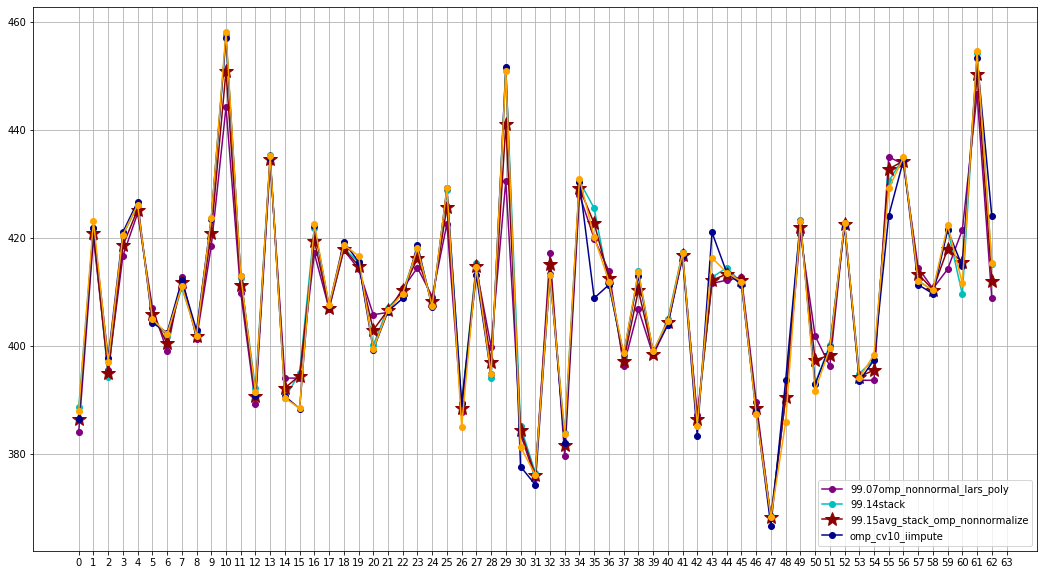

In [80]:
plt.figure(figsize=(18,10))
#plt.plot(pd.read_csv('try_answer_columns_lassolars.csv',header=None)[1],color='c',marker='o',label='98.5104lassolars')
#plt.plot(pd.read_csv('try_answer_columns_omp_lars_poly.csv',header=None)[1],color='c',marker='o',label='99.14omp_lars_poly')
plt.plot(pd.read_csv('try_answer_columns_omp_nonnormalize_lar_poly.csv',header=None)[1],color='purple',marker='o',label='99.07omp_nonnormal_lars_poly')
plt.plot(pd.read_csv('try_answer_columns_stack_omp_lar_poly.csv',header=None)[1],color='c',marker='o',label='99.14stack')
plt.plot(pd.read_csv('try_answer_columns_avg_stack_omp_nonnormalize.csv',header=None)[1],color='darkred',marker='*',markersize=15,label='99.15avg_stack_omp_nonnormalize')
#plt.plot(pd.read_csv('try_answer_columns_omp.csv',header=None)[1],color='darkgreen',marker='o',label='98.59omp')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_cv10.csv',header=None)[1],color='darkgreen',marker='o',label='98.98stack_omp_cv10')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_non_cv5.csv',header=None)[1],color='darkgreen',marker='o',label='stack_omp_non_cv5')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_cv248.csv',header=None)[1],color='darkblue',marker='o',label='99.11stack_omp_cv248')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_non_cv248.csv',header=None)[1],color='darkgreen',marker='o',label='stack_omp_non_cv248')
#plt.plot(pd.read_csv('try_answer_columns_omp_n11_iimpute.csv',header=None)[1],color='darkorange',marker='o',label='')
plt.plot(pd.read_csv('try_answer_columns_omp_cv10_iimpute.csv',header=None)[1],color='darkblue',marker='o',label='omp_cv10_iimpute')
plt.plot(y_pred,color='orange',marker='o',label='')
plt.xticks(np.arange(0,64,1))
plt.grid(which='major')
plt.legend(loc='lower right')